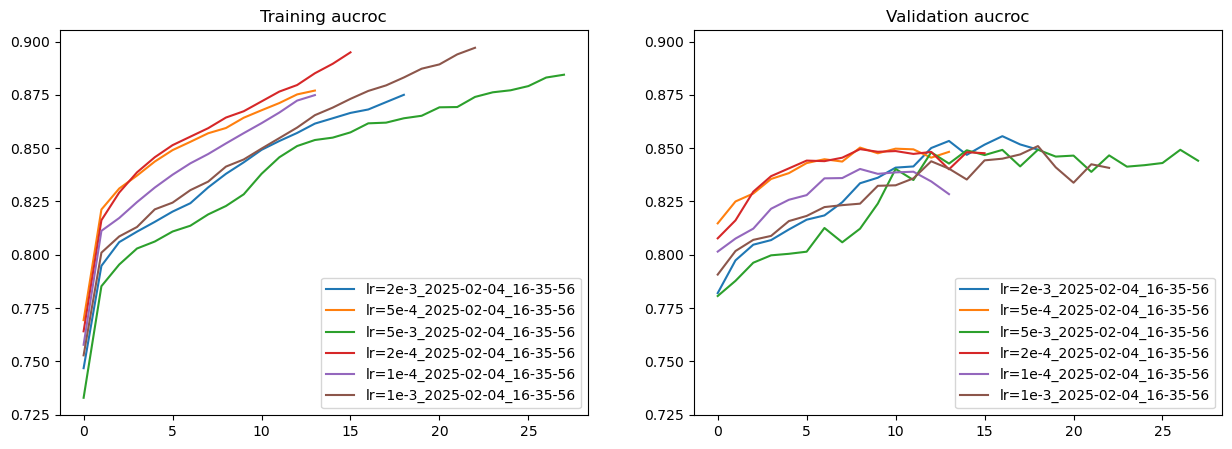

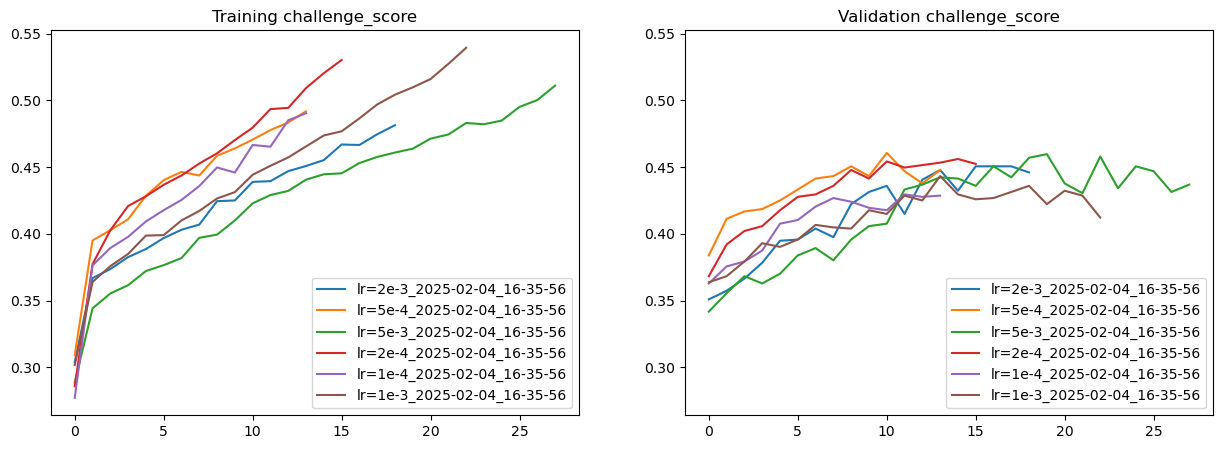

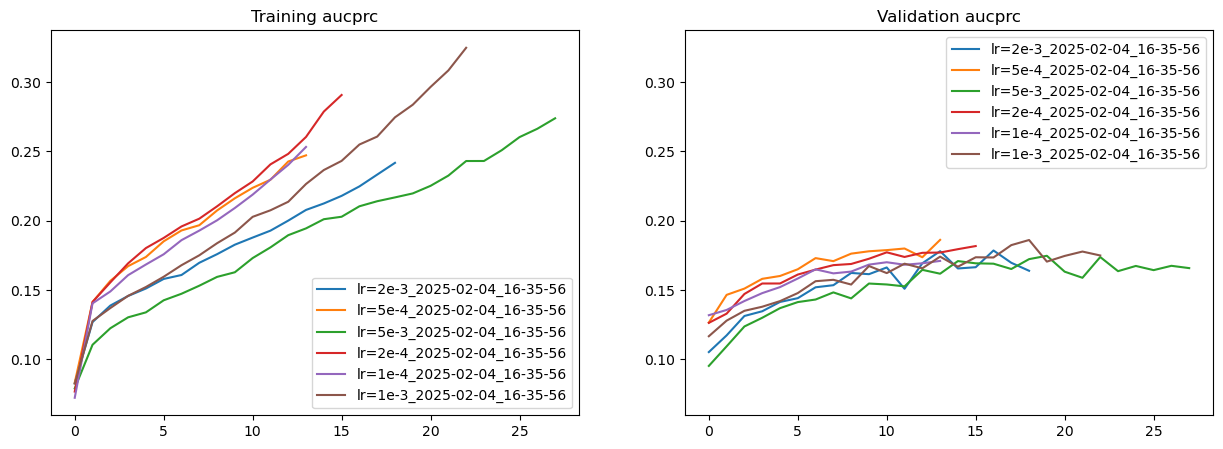

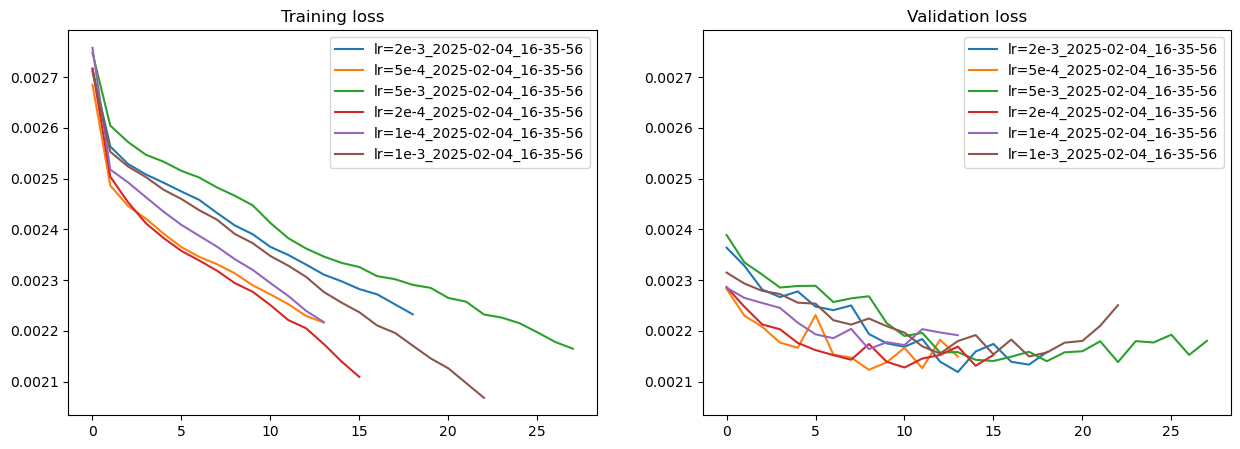

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os

ray_path = "/home/stenheli/ray_results/load_and_train_2025-02-04_16-35-56"

# in ray path, there are several folders, each folder is a run.
# in each run, there is a file called progress.csv
val_prefix = "val_"
train_prefix = "train_"
results = {}
col_names = set()
for root, dirs, files in os.walk(ray_path):
    for file in files:
        if file == "progress.csv":
            df = pd.read_csv(os.path.join(root, file))
            results[root] = {}
            for col in df.columns:
                if col.startswith((val_prefix, train_prefix)):
                    results[root][col] = df[col].values
                    col_names.add(col)

col_names_no_prefix = set()
for col in col_names:
    if col.startswith(val_prefix):
        col_names_no_prefix.add(col[len(val_prefix) :])
    elif col.startswith(train_prefix):
        col_names_no_prefix.add(col[len(train_prefix) :])

for col in col_names_no_prefix:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    for run, data in results.items():
        runname = run.split("/")[-1][29:]
        ax[0].plot(data[f"{train_prefix}{col}"], label=runname)
        ax[0].set_title(f"Training {col}")
        ax[0].legend()
        ax[1].plot(data[f"{val_prefix}{col}"], label=runname)
        ax[1].set_title(f"Validation {col}")
        ax[1].set_ylim(ax[0].get_ylim())
        ax[1].legend()
    plt.show()